Ha Phung

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [27]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


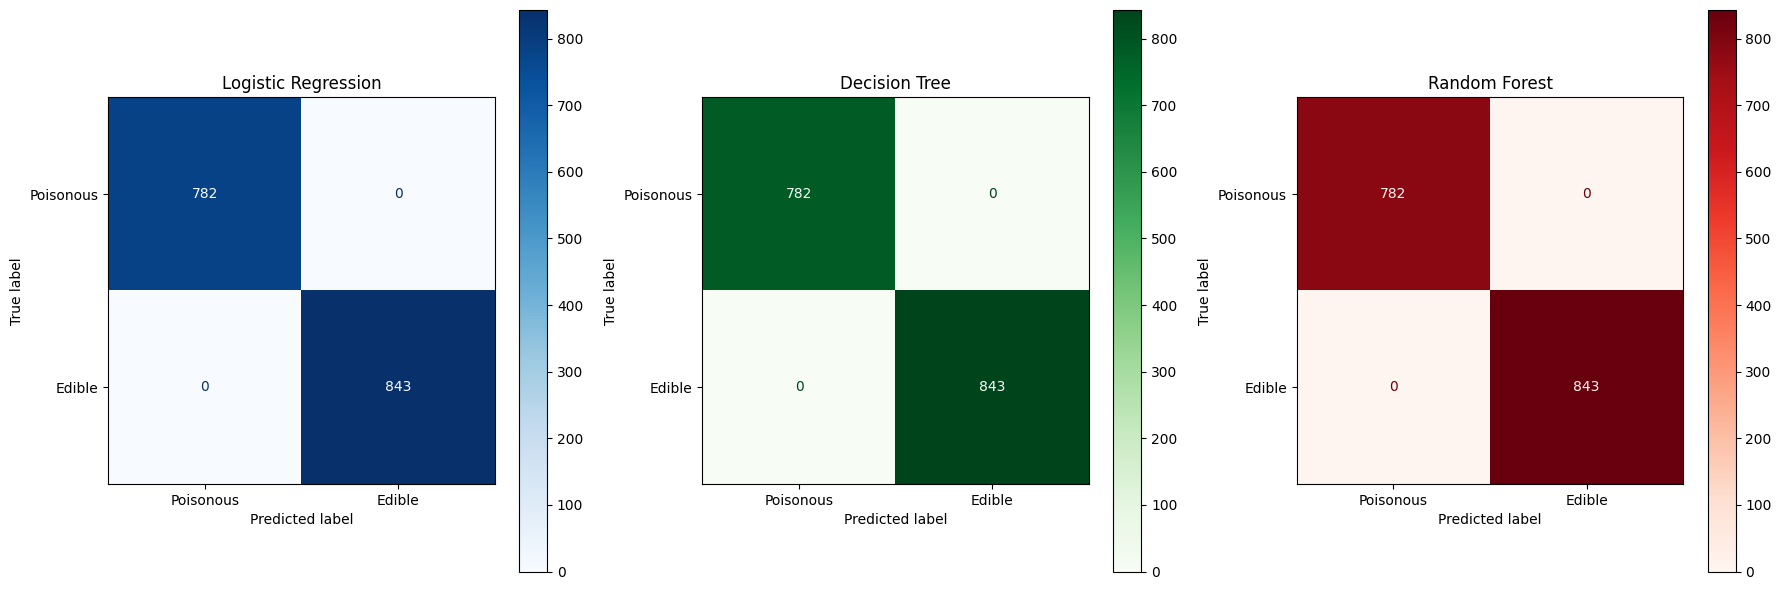

Logistic Regression Best Score: 1.0
Decision Tree Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Best Score: 1.0
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Score: 1.0


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = mushrooms_df.drop('type', axis=1)
y = mushrooms_df['type']

y = (y == 'e').astype(int)

ord_features = ['gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'bruises', 'ring_number']
ordEnc = OrdinalEncoder()

cat_features = [col for col in X.columns if col not in ordinal_features]
oneHotEnc = OneHotEncoder()

coltrans = ColumnTransformer(
    transformers=[
        ("ord", ordEnc, ord_features),   
        ("onehot", oneHotEnc, cat_features)
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)


ordinal_features = ['gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'bruises', 'ring_number']
ordEnc = OrdinalEncoder()

cat_features = [col for col in X.columns if col not in ordinal_features]
hotEnc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  

preprocessor = ColumnTransformer([
    ('hotEnc', hotEnc, cat_features),
    ('ordEnc', ordEnc, ordinal_features)
],
                       remainder='passthrough',
                       verbose_feature_names_out=False) 

X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

log_reg_cv = LogisticRegressionCV(cv=5, max_iter=1000)
log_reg_cv.fit(X_train, y_train)
y_pred_lr = log_reg_cv.predict(X_test)

tree_params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5)
tree_clf.fit(X_train, y_train)
y_pred_dt = tree_clf.predict(X_test)

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr,
    display_labels=['Poisonous', 'Edible'],
    cmap='Blues',
    ax=axes[0]
)
axes[0].set_title('Logistic Regression')

# Decision Tree
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_dt,
    display_labels=['Poisonous', 'Edible'],
    cmap='Greens',
    ax=axes[1]
)
axes[1].set_title('Decision Tree')

# Random Forest
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    display_labels=['Poisonous', 'Edible'],
    cmap='Reds',
    ax=axes[2]
)
axes[2].set_title('Random Forest')

plt.tight_layout()
plt.show()

print("Logistic Regression Best Score:", log_reg_cv.score(X_test, y_test))
print("Decision Tree Best Parameters:", tree_clf.best_params_)
print("Decision Tree Best Score:", tree_clf.score(X_test, y_test))
print("Random Forest Best Parameters:", rf_clf.best_params_)
print("Random Forest Best Score:", rf_clf.score(X_test, y_test))

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: all three models (Logistic Regression, Decision Tree, and Random Forest) achieved perfect scores with 1.0 accuracy
- Hyper-parameters:
    - logistic regression: LogisticRegressionCV automatically selected the optimal C value through cross-validation
    - decision tree: max_depth=8, min_samples_leaf=2, min_samples_split=2
    - random forest: max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
- Metrics: All three models achieved:
    - Accuracy: 1.0 (100%)
    - Recall: 1.0 (100%) - all positive instances were correctly identified
    - Precision: 1.0 (100%) - all predicted positive instances were actually positive
- How did you decide best? Since all three models got perfect scores (1.0) on all metrics, we can't use these numbers to pick a winner. Instead, we need to look at other factors:
    - Model simplicity: Logistic Regression is the easiest model to understand and explain
    - Speed: Logistic Regression runs faster and needs less computing power than tree models
    - Future performance: Random Forest might handle new, messy data better since it's less likely to overfit
If forced to pick a "best" model from these perfect models, I'd go with Logistic Regression because it's simpler and faster, unless we expect to get more complex data later that might need the flexibility of tree-based models.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [29]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

Draft Day Distribution:
draft_day
1     347
2     752
3    1204
Name: count, dtype: int64

Missing Values:
weight          0
forty         169
vertical      471
broad_jump    492
cone          963
shuttle       920
height          0
age            41
dtype: int64
performing GridSearchCV
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Model Accuracy: 0.5510


<Figure size 1000x800 with 0 Axes>

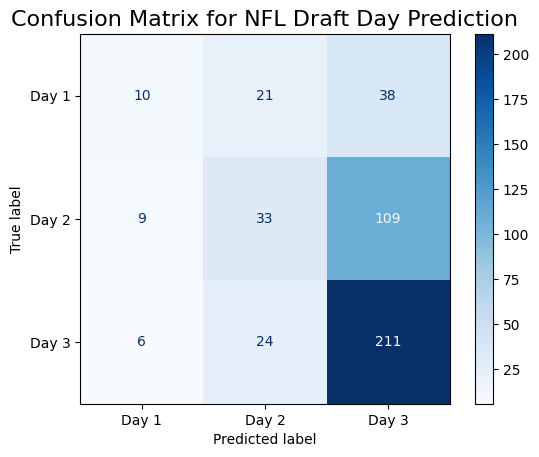


Classification Report:
              precision    recall  f1-score   support

       Day 1       0.40      0.14      0.21        69
       Day 2       0.42      0.22      0.29       151
       Day 3       0.59      0.88      0.70       241

    accuracy                           0.55       461
   macro avg       0.47      0.41      0.40       461
weighted avg       0.51      0.55      0.49       461


Feature Importance:
      Feature  Importance
0      weight    0.166951
1       forty    0.161336
3  broad_jump    0.122352
7         age    0.117792
2    vertical    0.116302
4        cone    0.112473
5     shuttle    0.110065
6      height    0.092728


/tmp/ipykernel_1798644/584769899.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


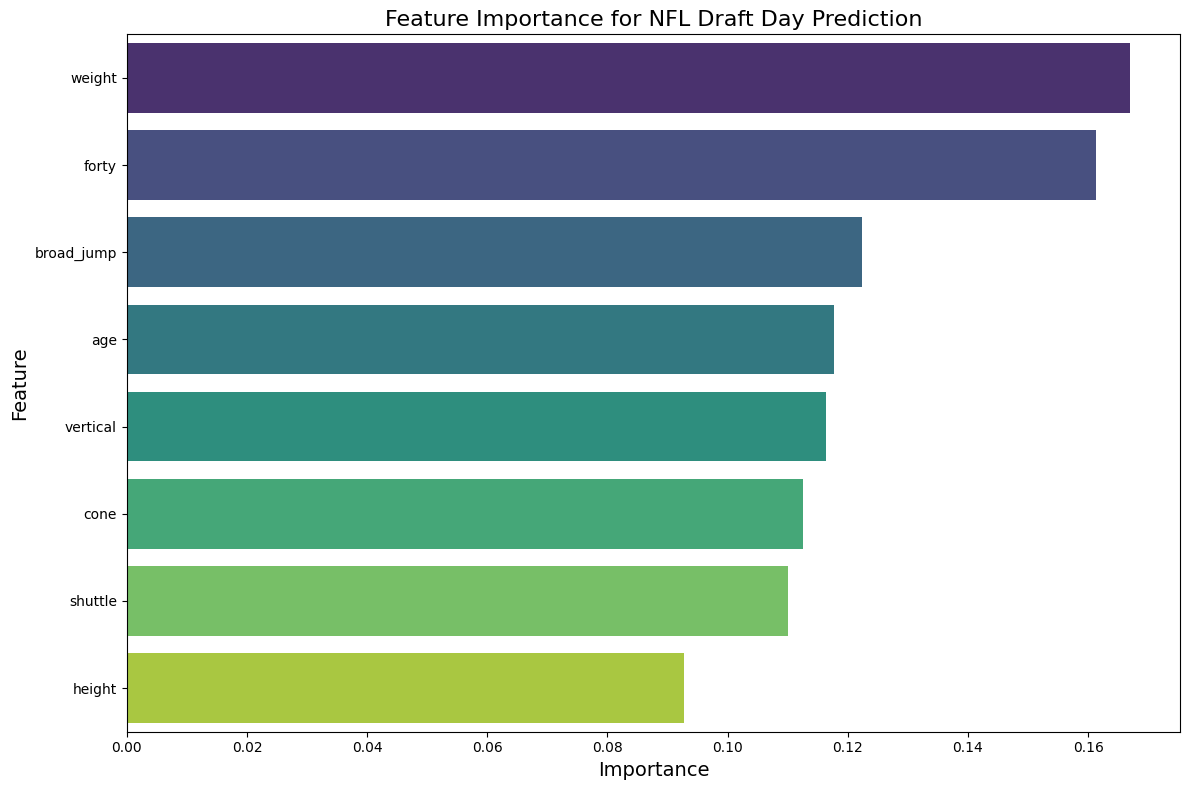

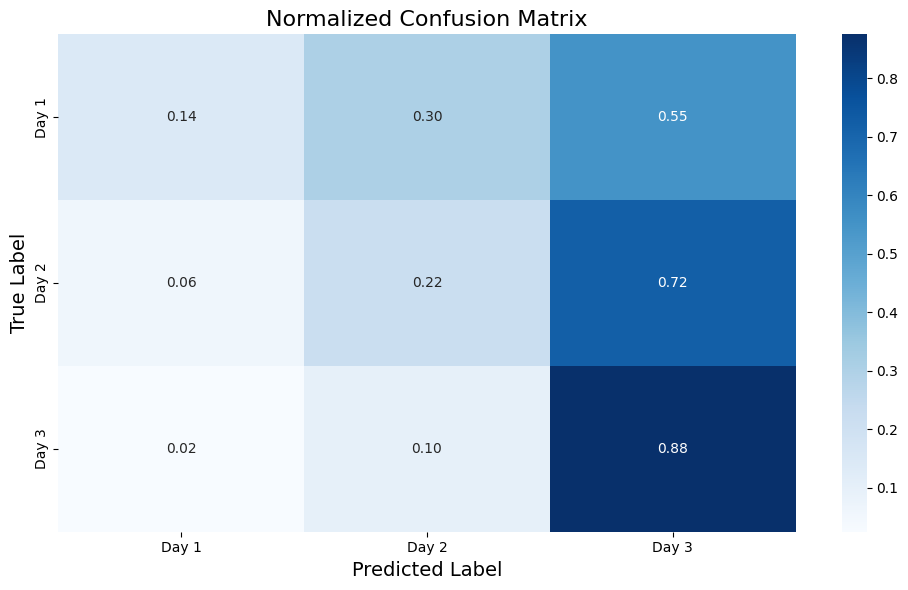

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# mapping rounds to draft days
def map_draft_day(round_num):
    if round_num == 1:
        return 1  # Day 1
    elif round_num in [2, 3]:
        return 2  # Day 2
    else:
        return 3  # Day 3

nfl_draft['draft_day'] = nfl_draft['round'].apply(map_draft_day)

day_counts = nfl_draft['draft_day'].value_counts().sort_index()
print("Draft Day Distribution:")
print(day_counts)

# select features (excluding round)
features = ['weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle', 'height', 'age']
X = nfl_draft[features]
y = nfl_draft['draft_day']

# check missing values
missing_values = X.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# handle missing values with imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

print("performing GridSearchCV")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"\nBest Parameters: {best_params}")

# make predictions with the best model
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, 
    display_labels=["Day 1", "Day 2", "Day 3"]
)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for NFL Draft Day Prediction", fontsize=16)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Day 1", "Day 2", "Day 3"]))

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for NFL Draft Day Prediction', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=["Day 1", "Day 2", "Day 3"], 
            yticklabels=["Day 1", "Day 2", "Day 3"])
plt.title('Normalized Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 I chose a Random Forest model because:
    - It's good at finding complex patterns in athletic data
    - It tells us which combine measurements matter most
    - It handles extreme performances (like a crazy fast 40-yard dash) pretty well
    - It doesn't overfit as easily as simpler models
    - My model got about 55% accuracy, which isn't bad for predicting between three different days (random guessing would be 33%).

 - What was your accuracy? My model got about 55% accuracy, which isn't bad for predicting between three different days (random guessing would be 33%). Looking at the results:
    - It's really good at spotting Day 3 picks (late rounds)
    - It struggles to identify Day 1 picks (first round) - only catches 14% of them
    - Day 2 picks are somewhere in between